## Study Changes in Happiness Scores over time (Countries with Highest vs. Lowest Avg. Happiness Score)
This analysis presents visuals of changes in happiness scores over time for countries with the highest and lowest average happiness scores. The idea being to visually represent the drastic differences in overall happiness scores between countries.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Change the default size of the Matplotlib graphs to 9x7 inches
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

In [3]:
# Pull in average happiness data
happiness_file = "../Happiness/Resources/avg_happiness.csv"
happiness_df = pd.read_csv(happiness_file, encoding = "UTF-8")
happiness_df.head()

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460
3,Norway,7.522,7.498,7.537,7.594,7.554,7.5410
4,Canada,7.427,7.404,7.316,7.328,7.278,7.3506


### Countries with Highest Avg. Happiness Score (Sample = 10 Countries)

In [4]:
# Get information for top 10 countries with the highest average happiness score
happiness_df = happiness_df.sort_values(by = ['Avg Happiness'], ascending = False)
avg_happiness_top10_df = happiness_df.iloc[:10]
avg_happiness_top10_df.set_index('Country', inplace = True)
avg_happiness_top10_df

,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness
Country,,,,,,
Denmark,7.527,7.526,7.522,7.555,7.600,7.5460
Norway,7.522,7.498,7.537,7.594,7.554,7.5410
Finland,7.406,7.413,7.469,7.632,7.769,7.5378
Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114
Iceland,7.561,7.501,7.504,7.495,7.494,7.5110
Netherlands,7.378,7.339,7.377,7.441,7.488,7.4046
Canada,7.427,7.404,7.316,7.328,7.278,7.3506
Sweden,7.364,7.291,7.284,7.314,7.343,7.3192
New Zealand,7.286,7.334,7.314,7.324,7.307,7.3130


In [5]:
# Create a new DataFrame that does not include 'Avg Happiness' column and can be used for future analysis
happiness_top10_df = avg_happiness_top10_df.drop(columns = 'Avg Happiness')

# Save to csv
happiness_top10_df.to_csv("Resources/happiness_top10.csv",
                                index = True, header = True)

In [6]:
# Create variables for names of different countries
top_country_1_name = happiness_top10_df.index[0]
top_country_2_name = happiness_top10_df.index[1]
top_country_3_name = happiness_top10_df.index[2]
top_country_4_name = happiness_top10_df.index[3]
top_country_5_name = happiness_top10_df.index[4]
top_country_6_name = happiness_top10_df.index[5]
top_country_7_name = happiness_top10_df.index[6]
top_country_8_name = happiness_top10_df.index[7]
top_country_9_name = happiness_top10_df.index[8]
top_country_10_name = happiness_top10_df.index[9]

In [7]:
# Create variables holding numpy arrays of different rows of the sample_happiness_df
top_country_1_info = happiness_top10_df.iloc[0].values
top_country_2_info = happiness_top10_df.iloc[1].values
top_country_3_info = happiness_top10_df.iloc[2].values
top_country_4_info = happiness_top10_df.iloc[3].values
top_country_5_info = happiness_top10_df.iloc[4].values
top_country_6_info = happiness_top10_df.iloc[5].values
top_country_7_info = happiness_top10_df.iloc[6].values
top_country_8_info = happiness_top10_df.iloc[7].values
top_country_9_info = happiness_top10_df.iloc[8].values
top_country_10_info = happiness_top10_df.iloc[9].values

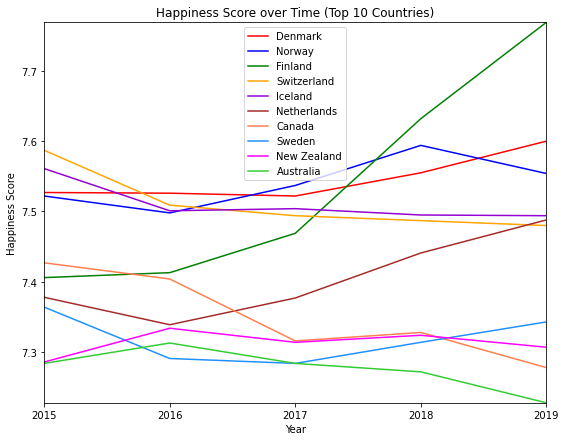

In [8]:
# Add labels to X and Y axes :: Add title
year = ['2015', '2016', '2017', '2018', '2019']
plt.title("Happiness Score over Time (Top 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")

# Plot the charts and apply some styling
top_country_1, = plt.plot(year, top_country_1_info, color="red", label= top_country_1_name)
top_country_2, = plt.plot(year, top_country_2_info, color="blue", label= top_country_2_name)
top_country_3, = plt.plot(year, top_country_3_info, color="green", label= top_country_3_name)
top_country_4, = plt.plot(year, top_country_4_info, color="orange", label= top_country_4_name)
top_country_5, = plt.plot(year, top_country_5_info, color= "darkviolet", label= top_country_5_name)
top_country_6, = plt.plot(year, top_country_6_info, color= "brown", label= top_country_6_name)
top_country_7, = plt.plot(year, top_country_7_info, color= "coral", label= top_country_7_name)
top_country_8, = plt.plot(year, top_country_8_info, color= "dodgerblue", label= top_country_8_name)
top_country_9, = plt.plot(year, top_country_9_info, color= "magenta", label= top_country_9_name)
top_country_10, = plt.plot(year, top_country_10_info, color= "limegreen", label= top_country_10_name)

# Create a legend for the chart
plt.legend(handles=[top_country_1, top_country_2, top_country_3, top_country_4,\
                    top_country_5, top_country_6, top_country_7, top_country_8,\
                    top_country_9, top_country_10], loc="best")
plt.margins(0)
plt.show()

### Countries with Lowest Avg. Happiness Score (Sample = 10 Countries)

In [9]:
# Get information for bottom 10 countries with the lowest average happiness score
avg_happiness_bottom10_df = happiness_df.iloc[-10:]
avg_happiness_bottom10_df.set_index('Country', inplace = True)
avg_happiness_bottom10_df = avg_happiness_bottom10_df.sort_values(by = ['Avg Happiness'],\
                                                                  ascending = True)
avg_happiness_bottom10_df

,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness
Country,,,,,,
Burundi,2.905,2.905,2.905,2.905,3.775,3.0790
Syria,3.006,3.069,3.462,3.462,3.462,3.2922
Rwanda,3.465,3.515,3.471,3.408,3.334,3.4386
Tanzania,3.781,3.666,3.349,3.303,3.231,3.4660
Afghanistan,3.575,3.360,3.794,3.632,3.203,3.5128
Togo,2.839,3.303,3.495,3.999,4.085,3.5442
Yemen,4.077,3.724,3.593,3.355,3.380,3.6258
Madagascar,3.681,3.695,3.644,3.774,3.933,3.7454
Botswana,4.332,3.974,3.766,3.590,3.488,3.8300


In [10]:
# Create a new DataFrame that does not include 'Avg Happiness' column and can be used for future analysis
happiness_bottom10_df = avg_happiness_bottom10_df.drop(columns = 'Avg Happiness')

# Save to csv
happiness_bottom10_df.to_csv("Resources/happiness_bottom10.csv",
                                index = True, header = True)

In [11]:
# Create variables for names of different countries
bot_country_1_name = happiness_bottom10_df.index[0]
bot_country_2_name = happiness_bottom10_df.index[1]
bot_country_3_name = happiness_bottom10_df.index[2]
bot_country_4_name = happiness_bottom10_df.index[3]
bot_country_5_name = happiness_bottom10_df.index[4]
bot_country_6_name = happiness_bottom10_df.index[5]
bot_country_7_name = happiness_bottom10_df.index[6]
bot_country_8_name = happiness_bottom10_df.index[7]
bot_country_9_name = happiness_bottom10_df.index[8]
bot_country_10_name = happiness_bottom10_df.index[9]

In [12]:
# Create variables holding numpy arrays of different rows of the sample_happiness_df
bot_country_1_info = happiness_bottom10_df.iloc[0].values
bot_country_2_info = happiness_bottom10_df.iloc[1].values
bot_country_3_info = happiness_bottom10_df.iloc[2].values
bot_country_4_info = happiness_bottom10_df.iloc[3].values
bot_country_5_info = happiness_bottom10_df.iloc[4].values
bot_country_6_info = happiness_bottom10_df.iloc[5].values
bot_country_7_info = happiness_bottom10_df.iloc[6].values
bot_country_8_info = happiness_bottom10_df.iloc[7].values
bot_country_9_info = happiness_bottom10_df.iloc[8].values
bot_country_10_info = happiness_bottom10_df.iloc[9].values

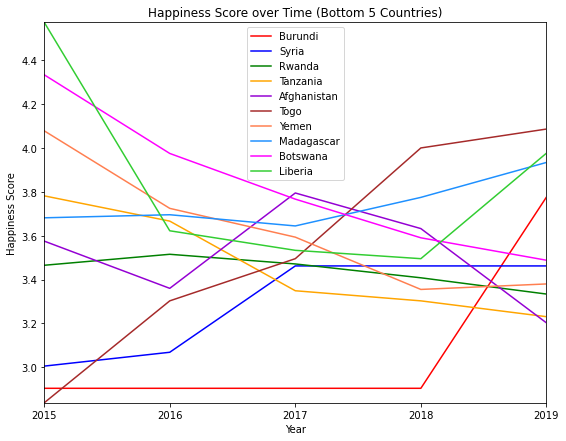

In [13]:
# Add labels to X and Y axes :: Add title
year = ['2015', '2016', '2017', '2018', '2019']
plt.title("Happiness Score over Time (Bottom 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")

# Plot the charts and apply some styling
bot_country_1, = plt.plot(year, bot_country_1_info, color="red", label= bot_country_1_name)
bot_country_2, = plt.plot(year, bot_country_2_info, color="blue", label= bot_country_2_name)
bot_country_3, = plt.plot(year, bot_country_3_info, color="green", label= bot_country_3_name)
bot_country_4, = plt.plot(year, bot_country_4_info, color="orange", label= bot_country_4_name)
bot_country_5, = plt.plot(year, bot_country_5_info, color= "darkviolet", label= bot_country_5_name)
bot_country_6, = plt.plot(year, bot_country_6_info, color= "brown", label= bot_country_6_name)
bot_country_7, = plt.plot(year, bot_country_7_info, color= "coral", label= bot_country_7_name)
bot_country_8, = plt.plot(year, bot_country_8_info, color= "dodgerblue", label= bot_country_8_name)
bot_country_9, = plt.plot(year, bot_country_9_info, color= "magenta", label= bot_country_9_name)
bot_country_10, = plt.plot(year, bot_country_10_info, color= "limegreen", label= bot_country_10_name)

# Create a legend for the chart
plt.legend(handles=[bot_country_1, bot_country_2, bot_country_3, bot_country_4,\
                    bot_country_5, bot_country_6, bot_country_7, bot_country_8,\
                    bot_country_9, bot_country_10], loc="best")

plt.margins(0)
plt.show()